<font size="+3" color='#0e46ad'><b> <center><u>Window store data analysis</u></center></b></font>

Microsoft Windows, commonly referred to as Windows, is a group of several proprietary graphical operating system families, all of which are developed and marketed by Microsoft. 
Microsoft Store is a digital distribution platform owned by Microsoft. It started as an app store for Windows 8 and Windows Server 2012 as the primary means of distributing Universal Windows Platform apps

*Source-Wikipedia*

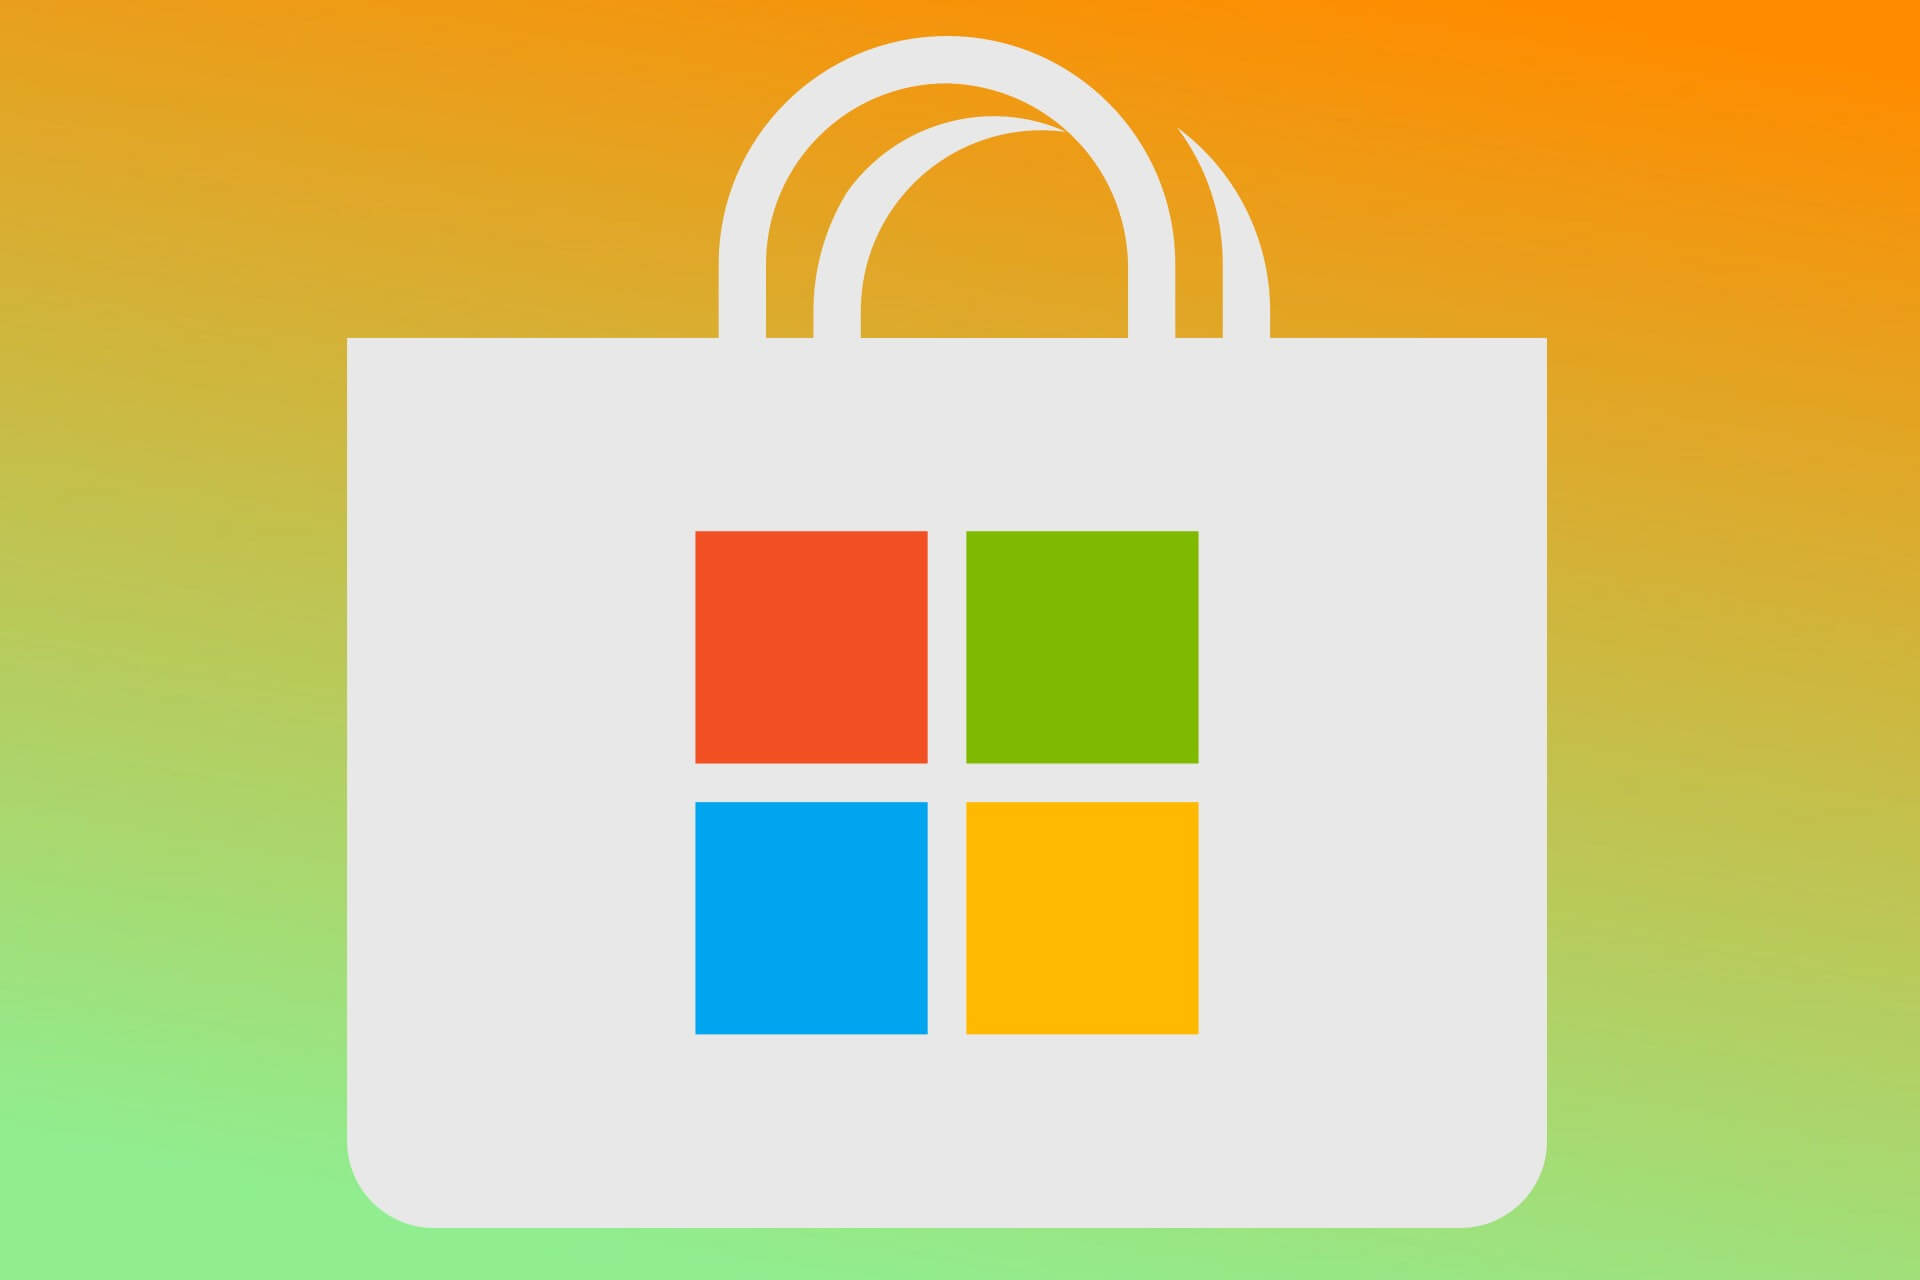

# About Dataset

This dataset is the data of the apps that are present in the Microsoft Windows Store, The data contains Name, Rating ,Category , Date and Price of the apps .You can find this dataset from [here].(https://www.kaggle.com/vishnuvarthanrao/windows-store)

<font size="+2" color='green'><b>Please Upvote my notebook if you think it is helpful.</b></font>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
data=pd.read_csv('../input/windows-store/msft.csv')

In [ ]:
data.head()

In [ ]:
data.describe()

#### mean rating is 3.79 and standard deviation 0.99 that means on an average rating is 3.79 and it can very by 0.99 according to this dataset.

# Apps Category Distribution

In [ ]:
df=data['Category'].value_counts()
df=pd.DataFrame(df)
df=df.rename(columns={'Category': 'Count'})
df.reset_index(inplace=True)
df=df.rename(columns={'index': 'Category'})

In [ ]:
df

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Category',
    y='Count',
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)

#### As you can see maximum numbers of apps are of Music,Books and business category

# Category of apps having 5* Rating

In [ ]:
df=data[data['Rating']==data['Rating'].max()].groupby('Category')['Name'].count()
df=pd.DataFrame(df)
df=df.rename(columns={'Name': 'No.of apps having 5* Rating'})
df.reset_index(inplace=True)
df=df.rename(columns={'index': 'Category'})
df=df.sort_values('No.of apps having 5* Rating',ascending=False).head(10)

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Category',
    y='No.of apps having 5* Rating',
    palette='Set1',
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)

#### Books ,Developer tools and business category has highest number of 5* ratings

# Apps having price greater than 1000 

In [ ]:
def fn(x):
    if x!='Free' and x!='NaN':
        #print(x)
        x=str(x)
        if '₹' in x:
            x=x.split('₹')[1]
        if ',' in x:       
            x,y=x.split(',')
            x=x+y
        x=float(x)
        return x
    else:
        return 0

In [ ]:
data['Price']=data['Price'].apply(lambda x: fn(x))

In [ ]:
df=data.sort_values(['Price'],ascending=False)[['Name','Price']]
df=df[df['Price']>=1000.0]


In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Name',
    y='Price'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Apps having price greater than 1000")

# Average rating yearly

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data=data.sort_values('Date')
df=data.groupby(data['Date'].dt.year)['Rating'].mean()
df=pd.DataFrame(df).reset_index().rename(columns={'Date': 'year'})
df

In [ ]:
fig = px.line(df, x='year', y='Rating')
fig.show()

# Number of people Rated by Category

In [ ]:
df=data.groupby('Category')['No of people Rated'].sum()
df=pd.DataFrame(df).reset_index().sort_values(['No of people Rated'],ascending=False)

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='Category',
    y='No of people Rated'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("Number of people Rated by Category")

In [ ]:
fig = px.pie(df, values='No of people Rated', names='Category')
fig.show()

# Good , average , poor apps

In [ ]:
quality=[]
for r in data['Rating']:
    if r>=4.0:
        quality.append('Good')
    elif r>=3.5 and r<4.0:
        quality.append('Average')
    else:
        quality.append('Poor')
data['app_quality']=quality

In [ ]:
df=data.groupby('app_quality')['Name'].count()
df=pd.DataFrame(df).reset_index().rename(columns={'Name': 'Count'})

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='app_quality',
    y='Count',
    palette='Set1',
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)

# Apps category Wordcloud

In [ ]:
Category=data['Category'][~pd.isnull(data['Category'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(Category))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Category'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

# Scatter plot of rating vs price 

In [ ]:
df=data[data['Price']!=0.0].sort_values('Rating')
sns.scatterplot(df['Rating'],df['Price'])

# No. of people rated each year

In [ ]:
df=data.groupby(data['Date'].dt.year)['No of people Rated'].sum()
df=pd.DataFrame(df).reset_index().rename(columns={'Date': 'year'})
df=df.rename(columns={'Name': 'No of people Rated'})
df.year=df.year.astype('int')


In [ ]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df,
    x='year',
    y='No of people Rated'
)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.yaxis.label.set_text("No. of people rated each year")

# Good , average , poor rating category wise

In [ ]:
good=data.groupby('app_quality').get_group('Good')
good=good.groupby('Category')['Name'].count()

average=data.groupby('app_quality').get_group('Average')
average=average.groupby('Category')['Name'].count()

poor=data.groupby('app_quality').get_group('Poor')
poor=poor.groupby('Category')['Name'].count()


In [ ]:
fig2 = go.Figure(
    data=[
        go.Bar(
            name="good",
            x=good.index,
            y=good.values,
            offsetgroup=0,
            marker_color='green',
        ),
        go.Bar(
            name="average",
            x=average.index,
            y=average.values,
            offsetgroup=1,
            marker_color='orange'
        ),
        go.Bar(
            name="poor",
            x=poor.index,
            y=poor.values,
            offsetgroup=2,
            marker_color='red',
        )
    ],
    layout=go.Layout(
        title="Good , average , poor rating category wise",
        yaxis_title="Number of apps in a category"
    )
)
fig2.show()

# No. of apps yearly

In [ ]:

count=data.groupby(data['Date'].dt.year)['Name'].count()

fig = go.Figure(data=go.Scatter(x=data['Date'].dt.year.unique(),
                                y=count.values,
                                mode='lines',
                               marker_color='darkblue')) 

fig.update_xaxes(rangeslider_visible=True) # Range Slider is made true

fig.update_layout(title='No of apps yearly',xaxis_title="Date",yaxis_title="count of apps ")
fig.show()